In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config InlineBackend.figure_format ='svg'

In [2]:
options = {
    'model': 'cfg/yolo-voc.2.0-1c.cfg',
    'load': 1000,
    'threshold': 0.10,
}

tfnet = TFNet(options)

Parsing cfg/yolo-voc.2.0-1c.cfg
Loading None ...
Finished in 0.00020885467529296875s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 256)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?

In [3]:
img = cv2.imread('MIM8151.JPG', cv2.IMREAD_COLOR)

#Image dimension and Color Dimension
img.shape

(480, 640, 3)

In [4]:
result = tfnet.return_predict(img)

result

[{'bottomright': {'x': 52, 'y': 40},
  'confidence': 0.47293052,
  'label': 'LicensePlate',
  'topleft': {'x': 0, 'y': 0}},
 {'bottomright': {'x': 186, 'y': 231},
  'confidence': 0.47085834,
  'label': 'LicensePlate',
  'topleft': {'x': 0, 'y': 0}},
 {'bottomright': {'x': 256, 'y': 111},
  'confidence': 0.4693831,
  'label': 'LicensePlate',
  'topleft': {'x': 0, 'y': 0}},
 {'bottomright': {'x': 435, 'y': 209},
  'confidence': 0.4762497,
  'label': 'LicensePlate',
  'topleft': {'x': 0, 'y': 0}},
 {'bottomright': {'x': 101, 'y': 40},
  'confidence': 0.4727122,
  'label': 'LicensePlate',
  'topleft': {'x': 46, 'y': 0}},
 {'bottomright': {'x': 150, 'y': 40},
  'confidence': 0.4727119,
  'label': 'LicensePlate',
  'topleft': {'x': 95, 'y': 0}},
 {'bottomright': {'x': 199, 'y': 40},
  'confidence': 0.4727119,
  'label': 'LicensePlate',
  'topleft': {'x': 144, 'y': 0}},
 {'bottomright': {'x': 333, 'y': 231},
  'confidence': 0.4706955,
  'label': 'LicensePlate',
  'topleft': {'x': 10, 'y': 0}}

In [5]:
tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
tl

(0, 0)

In [6]:
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
br

(52, 40)

In [7]:
label = result[0]['label']

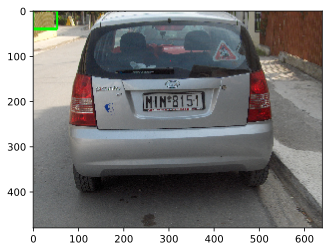

In [8]:
img = cv2.rectangle(img,tl, br,(0,255,0), 4)

#Redefine the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.putText(img,label,tl,cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)
plt.imshow(img)
plt.show()